# Predicting customer buying behaviour

# Importing Necessary Libraries

In [1]:
# pip install python-pptx

In [2]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# For creating PowerPoint summary
from pptx import Presentation
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor
from pptx.util import Inches

# For cross-validation visualization
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

# For displaying ROC curves
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [3]:
data = pd.read_csv('customer_booking.csv')

In [4]:
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [5]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
data.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0


# Data Exploration 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [8]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [9]:
data.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [10]:
data = data.rename(columns={'num_passengers':'No_of_Passengers','sales_channel':"Sales_Channel",'trip_type':'Type_of_Trip'})

In [11]:
data.head()

,No_of_Passengers,Sales_Channel,Type_of_Trip,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [12]:
data.isna().sum()

No_of_Passengers         0
Sales_Channel            0
Type_of_Trip             0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [13]:
data.duplicated().sum()

719

In [14]:
data = data.drop_duplicates()

In [15]:
data.duplicated().sum()

0

In [16]:
data.size

689934

In [17]:
data.shape

(49281, 14)

In [18]:
data.dtypes

No_of_Passengers           int64
Sales_Channel             object
Type_of_Trip              object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [19]:
# Calculate skewness and kurtosis for numerical columns
skewness_values = data.skew()
kurtosis_values = data.kurtosis()

In [20]:
skewness_values

No_of_Passengers         2.688095
purchase_lead            1.656817
length_of_stay           5.296476
flight_hour              0.398141
wants_extra_baggage     -0.714599
wants_preferred_seat     0.895741
wants_in_flight_meals    0.296680
flight_duration         -0.362110
booking_complete         1.960708
dtype: float64

In [21]:
kurtosis_values

No_of_Passengers         10.076058
purchase_lead             2.501577
length_of_stay           49.365201
flight_hour              -0.299858
wants_extra_baggage      -1.489408
wants_preferred_seat     -1.197696
wants_in_flight_meals    -1.912059
flight_duration          -1.372584
booking_complete          1.844451
dtype: float64

In [22]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = data.corr()

In [23]:
correlation_matrix

,No_of_Passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
No_of_Passengers,1.000000,0.214999,-0.115380,0.016393,0.120724,0.029509,0.022252,-0.062028,0.024092
purchase_lead,0.214999,1.000000,-0.076747,0.035112,-0.021599,-0.004459,-0.022533,0.067934,-0.022132
length_of_stay,-0.115380,-0.076747,1.000000,-0.025525,0.177536,0.031215,0.098846,0.140408,-0.042080
flight_hour,0.016393,0.035112,-0.025525,1.000000,-0.010911,0.012251,0.011953,-0.003236,0.006705
wants_extra_baggage,0.120724,-0.021599,0.177536,-0.010911,1.000000,0.208392,0.216835,0.057637,0.068452
wants_preferred_seat,0.029509,-0.004459,0.031215,0.012251,0.208392,1.000000,0.315162,0.100652,0.050189
wants_in_flight_meals,0.022252,-0.022533,0.098846,0.011953,0.216835,0.315162,1.000000,0.156233,0.026399
flight_duration,-0.062028,0.067934,0.140408,-0.003236,0.057637,0.100652,0.156233,1.000000,-0.106529
booking_complete,0.024092,-0.022132,-0.042080,0.006705,0.068452,0.050189,0.026399,-0.106529,1.000000


In [24]:
numerical_columns = data.select_dtypes(include='number')
numerical_columns.head()

,No_of_Passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,262,19,7,1,0,0,5.52,0
1,1,112,20,3,0,0,0,5.52,0
2,2,243,22,17,1,1,0,5.52,0
3,1,96,31,4,0,0,1,5.52,0
4,2,68,22,15,1,0,1,5.52,0


In [25]:
categorical_columns = data.select_dtypes(include='object')

In [26]:
categorical_columns.head()

,Sales_Channel,Type_of_Trip,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India


In [27]:
data.head(10)

,No_of_Passengers,Sales_Channel,Type_of_Trip,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [28]:
numerical_columns.columns

Index(['No_of_Passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete'],
      dtype='object')

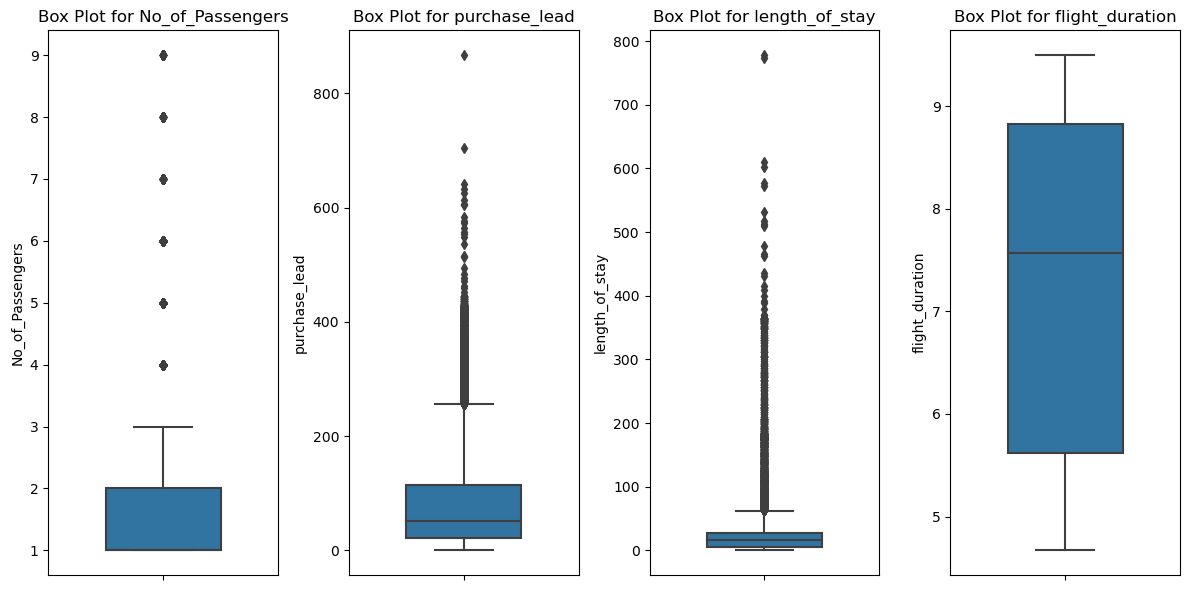

In [29]:
columns_to_plot = ['No_of_Passengers','purchase_lead','length_of_stay','flight_duration']

def boxplot_selected_columns(data, columns_to_plot):
    # Filter columns to include only those in the list
    numerical_cols = data[columns_to_plot]

    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Create a box plot for each selected column
    for col in numerical_cols.columns:
        plt.subplot(1, len(numerical_cols.columns), list(numerical_cols.columns).index(col) + 1)
        sns.boxplot(y=numerical_cols[col], orient="v", width=0.5)
        plt.title(f'Box Plot for {col}')
    
    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage with your DataFrame and selected columns
selected_cols = ['No_of_Passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']
boxplot_selected_columns(data,selected_cols)

In [30]:
# Define a threshold based on the 90th percentile
threshold = data.quantile(0.90)

# Cap or truncate values that exceed the threshold
selected_cols = ['No_of_Passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']
for col in selected_cols:
    data[col] = data[col].clip(upper=threshold[col])

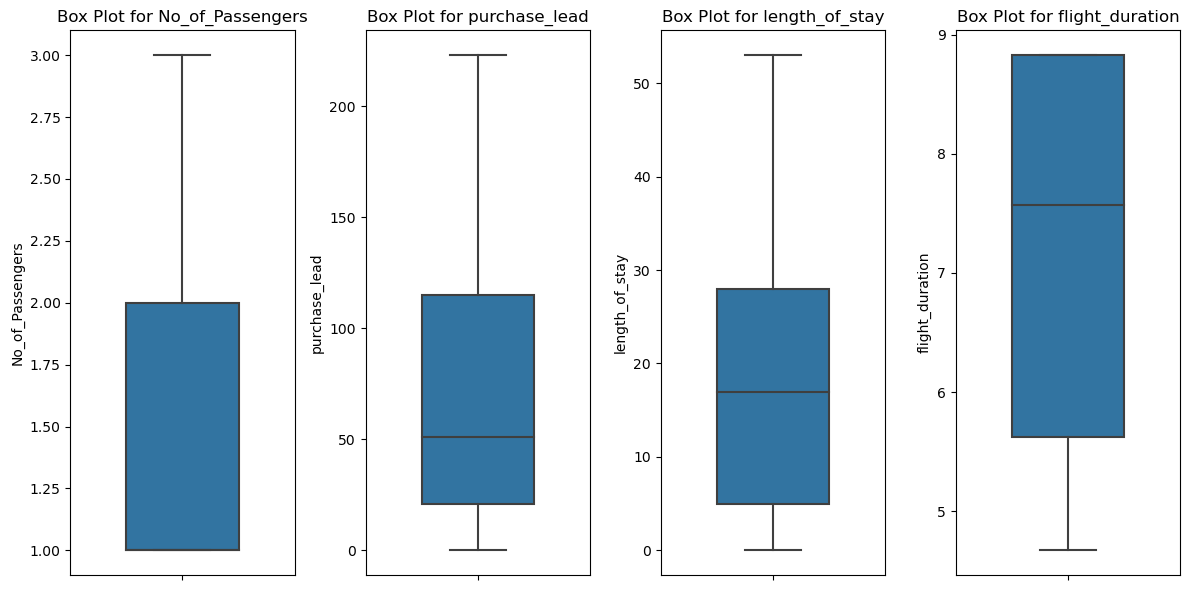

In [31]:
columns_to_plot = ['No_of_Passengers','purchase_lead','length_of_stay','flight_duration']

def boxplot_selected_columns(data, columns_to_plot):
    # Filter columns to include only those in the list
    numerical_cols = data[columns_to_plot]

    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Create a box plot for each selected column
    for col in numerical_cols.columns:
        plt.subplot(1, len(numerical_cols.columns), list(numerical_cols.columns).index(col) + 1)
        sns.boxplot(y=numerical_cols[col], orient="v", width=0.5)
        plt.title(f'Box Plot for {col}')
    
    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Example usage with your DataFrame and selected columns
selected_cols = ['No_of_Passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']
boxplot_selected_columns(data,selected_cols)

In [32]:
# Count unique values in a categorical column, e.g., 'Sales_Channel'
unique_sales_channel_count = data['Sales_Channel'].nunique()
print(unique_sales_channel_count)

2


In [33]:
unique_Type_of_Trip_count = data['Type_of_Trip'].nunique()
print(unique_Type_of_Trip_count)

3


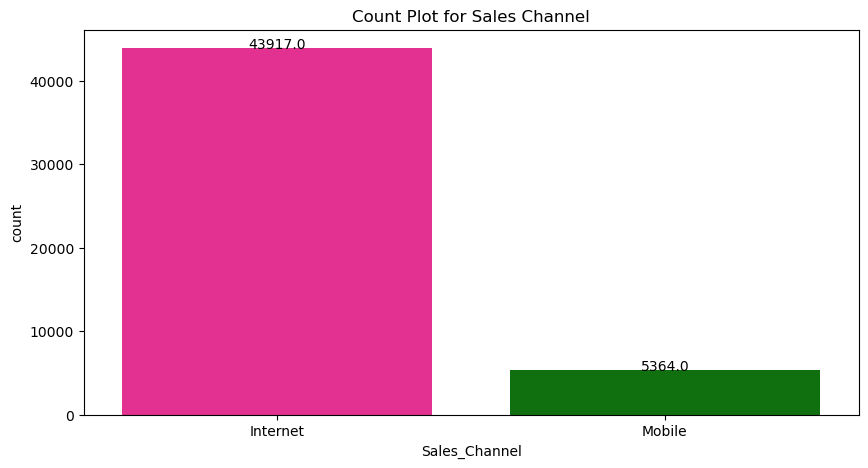

In [34]:
# Define custom colors for 'Sales Channel' categories
custom_colors = ["#FF1493", "#008000"]
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Sales_Channel',data=data,palette=custom_colors, order=data['Sales_Channel'].value_counts().index)
plt.xticks(rotation=0)
plt.title('Count Plot for Sales Channel')
# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')
plt.show()

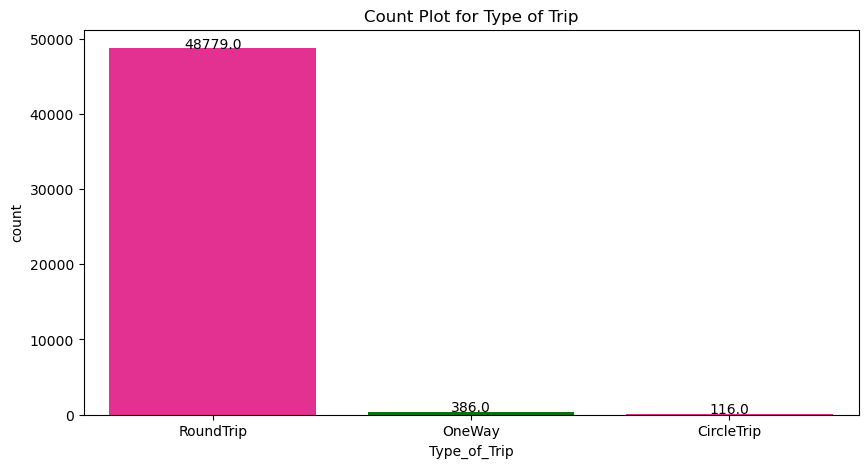

In [35]:
# Define custom colors
custom_colors = ["#FF1493", "#008000"]
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Type_of_Trip',data=data,palette=custom_colors,order=data['Type_of_Trip'].value_counts().index)
plt.xticks(rotation=0)
plt.title('Count Plot for Type of Trip')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

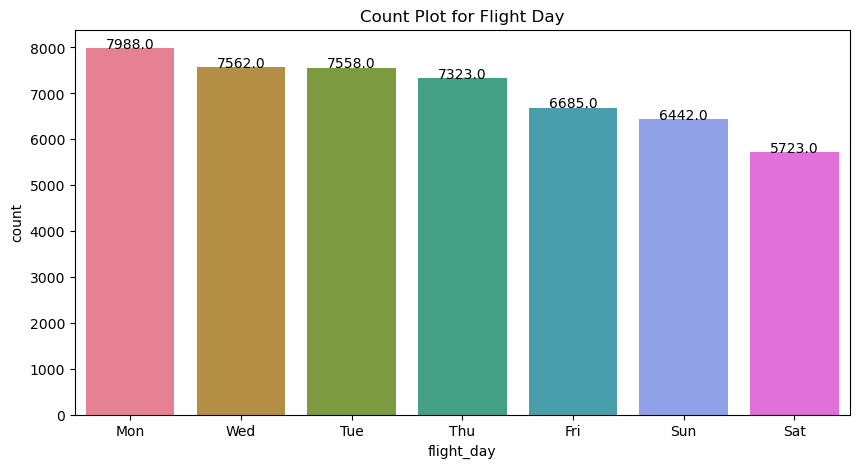

In [36]:
# Define custom colors
custom_palette = sns.color_palette("husl", 7)
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='flight_day',data=data,palette=custom_palette,order=data['flight_day'].value_counts().index)
plt.xticks(rotation=0)
plt.title('Count Plot for Flight Day')

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

plt.show()

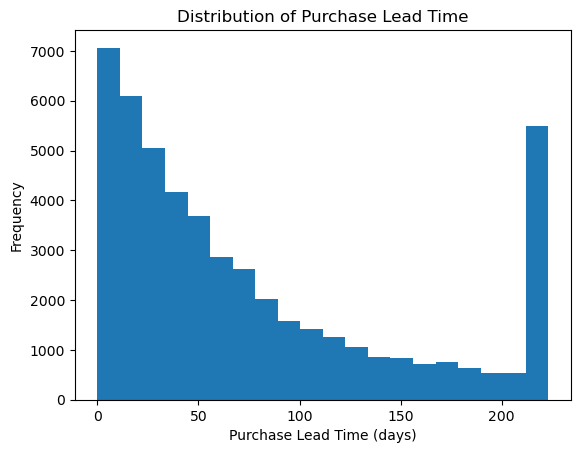

In [37]:
# Example: Create a histogram
plt.hist(data['purchase_lead'], bins=20)
plt.xlabel('Purchase Lead Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Lead Time')
plt.show()

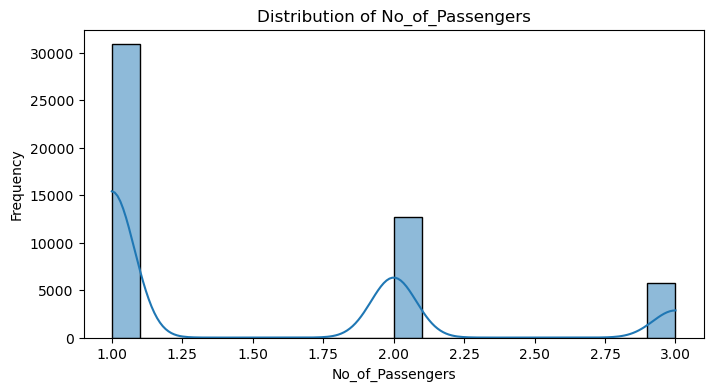

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram for 'No_of_Passengers'
plt.figure(figsize=(8, 4))
sns.histplot(data['No_of_Passengers'], bins=20, kde=True)
plt.title('Distribution of No_of_Passengers')
plt.xlabel('No_of_Passengers')
plt.ylabel('Frequency')
plt.show()

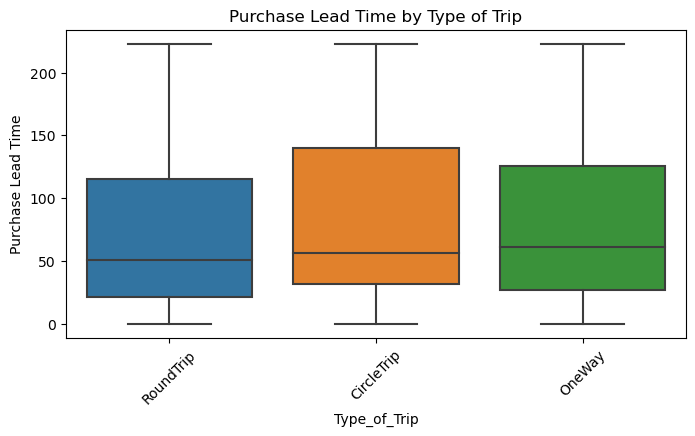

In [39]:
# Example: Box plot for 'purchase_lead' by 'Type_of_Trip'
plt.figure(figsize=(8, 4))
sns.boxplot(x='Type_of_Trip', y='purchase_lead', data=data)
plt.title('Purchase Lead Time by Type of Trip')
plt.xlabel('Type_of_Trip')
plt.ylabel('Purchase Lead Time')
plt.xticks(rotation=45)
plt.show()

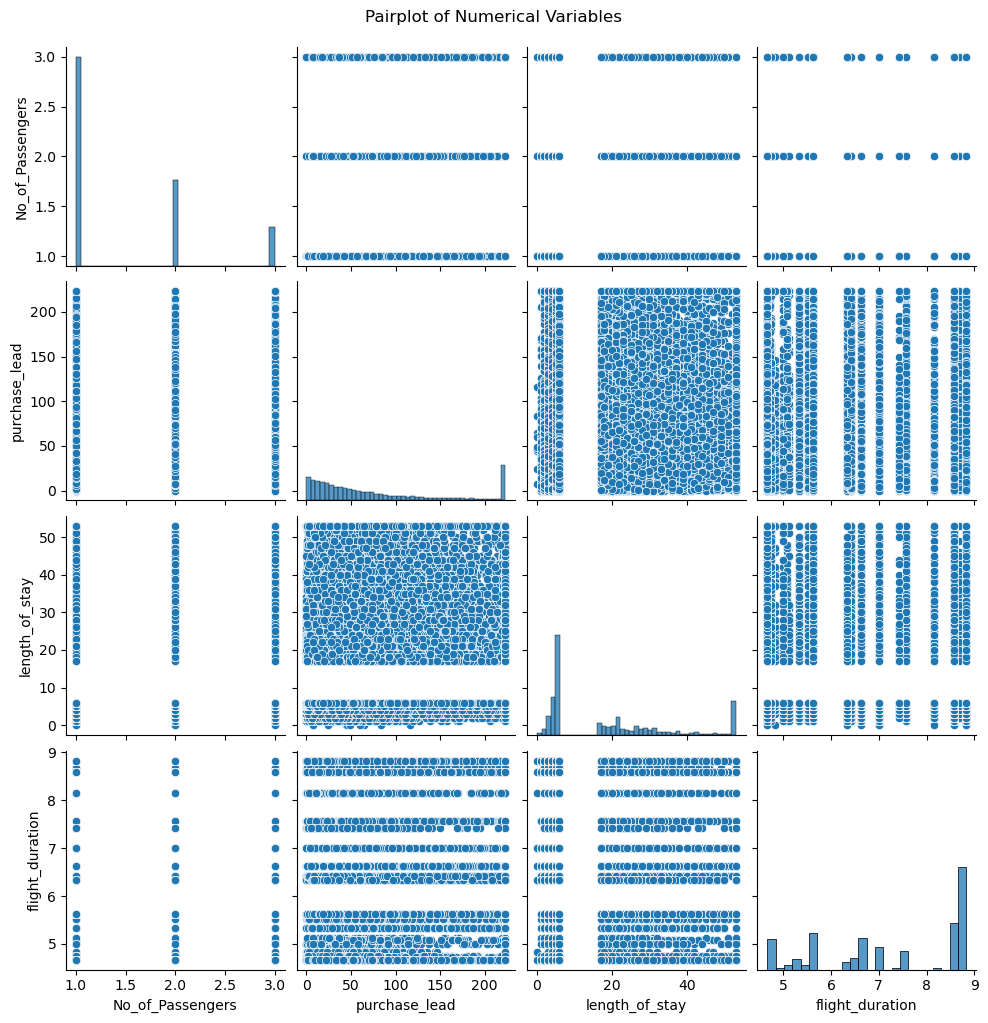

In [40]:
# Pairplot for selected numerical variables
selected_columns = ['No_of_Passengers', 'purchase_lead', 'length_of_stay', 'flight_duration']
sns.pairplot(data[selected_columns])
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

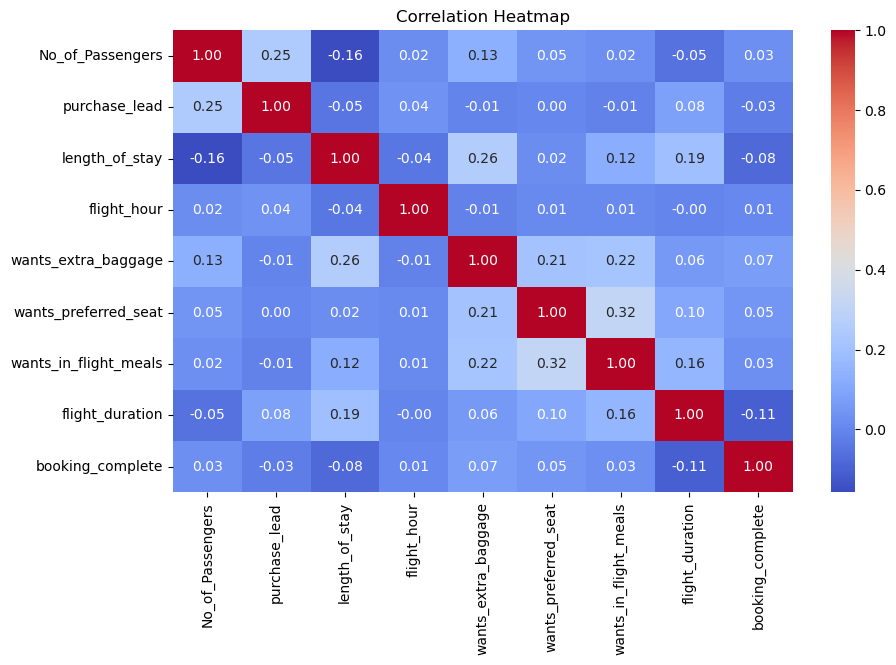

In [41]:
# Correlation heatmap for numerical variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

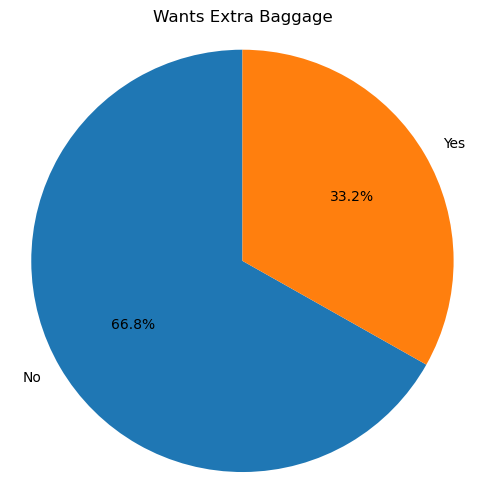

In [42]:
# Example: Pie chart for 'wants_extra_baggage'
wants_extra_baggage_counts = data['wants_extra_baggage'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(wants_extra_baggage_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('Wants Extra Baggage')
plt.axis('equal')
plt.show()

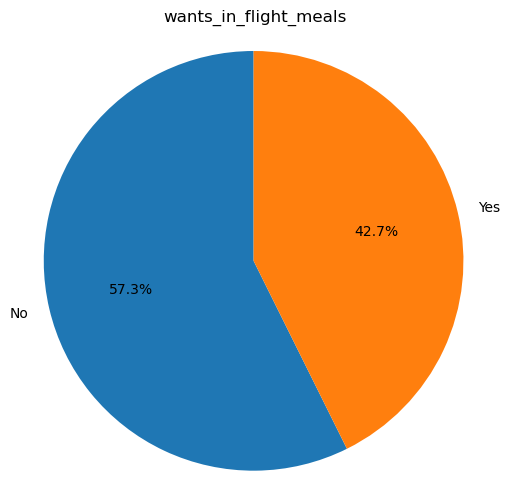

In [43]:
# Example: Pie chart for 'wants_extra_baggage'
wants_extra_baggage_counts = data['wants_in_flight_meals'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(wants_extra_baggage_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('wants_in_flight_meals')
plt.axis('equal')
plt.show()

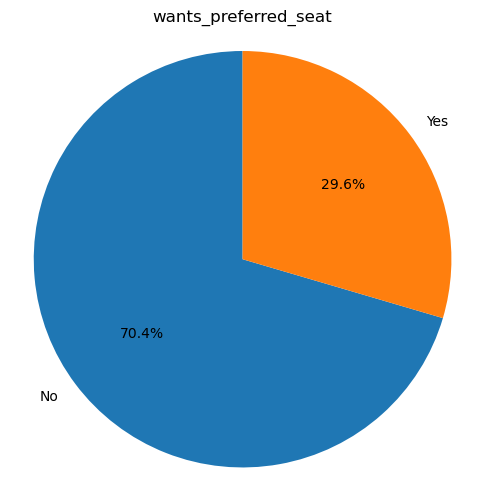

In [44]:
# Example: Pie chart for 'wants_extra_baggage'
wants_extra_baggage_counts = data['wants_preferred_seat'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(wants_extra_baggage_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90)
plt.title('wants_preferred_seat')
plt.axis('equal')
plt.show()

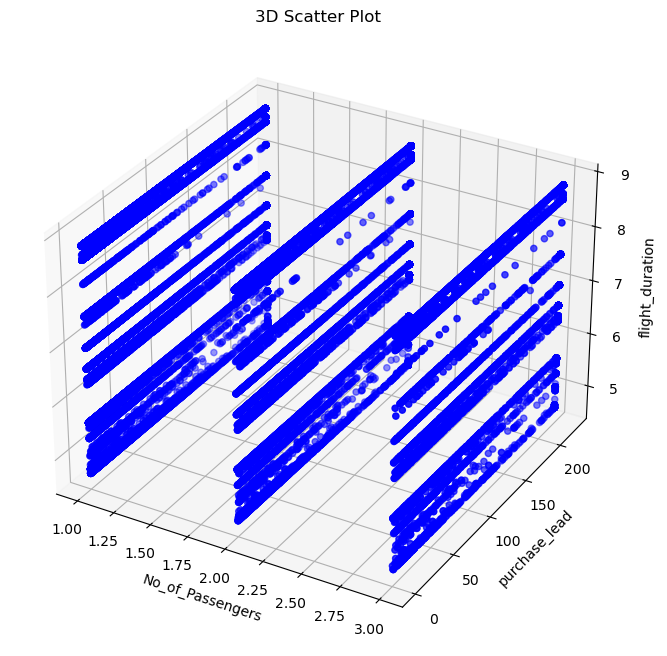

In [45]:
from mpl_toolkits.mplot3d import Axes3D

# Example: 3D scatter plot for 'No_of_Passengers', 'purchase_lead', and 'flight_duration'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['No_of_Passengers'], data['purchase_lead'], data['flight_duration'], c='b', marker='o')
ax.set_xlabel('No_of_Passengers')
ax.set_ylabel('purchase_lead')
ax.set_zlabel('flight_duration')
plt.title('3D Scatter Plot')
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
# Encode categorical columns using Label Encoding
categorical_cols = ['Sales_Channel', 'Type_of_Trip', 'flight_day','route','booking_origin']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [48]:
data.head()

,No_of_Passengers,Sales_Channel,Type_of_Trip,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.0,0,2,223.0,19.0,7,2,0,61,1,0,0,5.52,0
1,1.0,0,2,112.0,20.0,3,2,0,61,0,0,0,5.52,0
2,2.0,0,2,223.0,22.0,17,6,0,36,1,1,0,5.52,0
3,1.0,0,2,96.0,31.0,4,2,0,61,0,0,1,5.52,0
4,2.0,0,2,68.0,22.0,15,6,0,36,1,0,1,5.52,0


# Splitting Data

In [49]:
X =data.iloc[:,:-1]
y=data.iloc[:,-1]

In [50]:
X

,No_of_Passengers,Sales_Channel,Type_of_Trip,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2.0,0,2,223.0,19.0,7,2,0,61,1,0,0,5.52
1,1.0,0,2,112.0,20.0,3,2,0,61,0,0,0,5.52
2,2.0,0,2,223.0,22.0,17,6,0,36,1,1,0,5.52
3,1.0,0,2,96.0,31.0,4,2,0,61,0,0,1,5.52
4,2.0,0,2,68.0,22.0,15,6,0,36,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2.0,0,2,27.0,6.0,9,2,720,4,1,0,1,5.62
49996,1.0,0,2,111.0,6.0,4,3,720,4,0,0,0,5.62
49997,1.0,0,2,24.0,6.0,22,2,720,4,0,0,1,5.62
49998,1.0,0,2,15.0,6.0,11,1,720,4,1,0,1,5.62


In [51]:
y

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 49281, dtype: int64

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc =StandardScaler()
X_scaled= sc.fit_transform(X)

In [54]:
X_scaled

array([[ 0.73453671, -0.34948461,  0.0959242 , ..., -0.64785088,
        -0.86260637, -1.17631625],
       [-0.70500452, -0.34948461,  0.0959242 , ..., -0.64785088,
        -0.86260637, -1.17631625],
       [ 0.73453671, -0.34948461,  0.0959242 , ...,  1.54356509,
        -0.86260637, -1.17631625],
       ...,
       [-0.70500452, -0.34948461,  0.0959242 , ..., -0.64785088,
         1.15927732, -1.10946051],
       [-0.70500452, -0.34948461,  0.0959242 , ..., -0.64785088,
         1.15927732, -1.10946051],
       [-0.70500452, -0.34948461,  0.0959242 , ...,  1.54356509,
        -0.86260637, -1.10946051]])

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(X_scaled,y,test_size=0.25,random_state=1)

In [56]:
xtrain

array([[ 0.73453671, -0.34948461,  0.0959242 , ...,  1.54356509,
        -0.86260637, -0.57461462],
       [ 0.73453671, -0.34948461,  0.0959242 , ...,  1.54356509,
         1.15927732,  1.03660863],
       [-0.70500452, -0.34948461,  0.0959242 , ...,  1.54356509,
         1.15927732,  0.86946929],
       ...,
       [ 2.17407794, -0.34948461,  0.0959242 , ...,  1.54356509,
        -0.86260637, -1.10946051],
       [ 0.73453671, -0.34948461,  0.0959242 , ..., -0.64785088,
        -0.86260637,  0.86946929],
       [-0.70500452, -0.34948461,  0.0959242 , ...,  1.54356509,
         1.15927732, -0.18685134]])

In [57]:
xtest

array([[-0.70500452, -0.34948461,  0.0959242 , ..., -0.64785088,
        -0.86260637,  1.03660863],
       [-0.70500452, -0.34948461,  0.0959242 , ..., -0.64785088,
        -0.86260637, -1.10946051],
       [-0.70500452,  2.86135635,  0.0959242 , ..., -0.64785088,
        -0.86260637, -1.10946051],
       ...,
       [ 0.73453671, -0.34948461,  0.0959242 , ..., -0.64785088,
        -0.86260637,  1.03660863],
       [-0.70500452, -0.34948461,  0.0959242 , ..., -0.64785088,
        -0.86260637,  0.19422635],
       [ 2.17407794, -0.34948461,  0.0959242 , ...,  1.54356509,
         1.15927732,  1.03660863]])

In [58]:
ytrain

33221    0
18874    0
25484    0
3144     0
44100    0
        ..
44336    0
32925    0
5293     0
12335    0
33423    0
Name: booking_complete, Length: 36960, dtype: int64

In [59]:
ytest

683      1
8587     0
23781    0
40587    0
22105    0
        ..
9328     0
36417    0
8390     0
27907    1
710      0
Name: booking_complete, Length: 12321, dtype: int64

# Model Selection

# Model - LogisticRegression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
lg = LogisticRegression()

In [62]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [63]:
y_pred = lg.predict(xtest)

In [64]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)
conf_matrix = confusion_matrix(ytest, y_pred)

In [66]:
accuracy

0.8495252008765523

# Model - KNeighborsClassifier

In [67]:
kc= KNeighborsClassifier()

In [68]:
kc.fit(xtrain,ytrain)

KNeighborsClassifier()

In [69]:
y_pred = kc.predict(xtest)

In [70]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [71]:
# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)

In [72]:
accuracy

0.8289911533154777

# Model - RandomForestClassifier

In [73]:
rf = RandomForestClassifier()

In [74]:
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [75]:
y_pred=rf.predict(xtest)

In [76]:
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)
accuracy

0.848470091713335

# Model - Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dt = DecisionTreeClassifier()

In [80]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [81]:
y_pred = dt.predict(xtest)

In [82]:
y_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [83]:
# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)
accuracy

0.7765603441279118

# Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define your model (in this case, a RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=1)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)

# Calculate and print the mean and standard deviation of the scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()
print(f"Mean Accuracy: {mean_accuracy:.2f}")
print(f"Standard Deviation: {std_accuracy:.2f}")


Cross-Validation Scores:
[0.8506645  0.45982143 0.25344968 0.36556412 0.47808442]
Mean Accuracy: 0.48
Standard Deviation: 0.20


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model to the training data
model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(ytest, y_pred)
print(f"Precision: {precision:.2f}")

# Calculate recall
recall = recall_score(ytest, y_pred)
print(f"Recall: {recall:.2f}")

# Calculate F1-score
f1 = f1_score(ytest, y_pred)
print(f"F1-score: {f1:.2f}")

# Create and print the confusion matrix
confusion = confusion_matrix(ytest, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.85
Precision: 0.46
Recall: 0.08
F1-score: 0.14
Confusion Matrix:
[[10285   182]
 [ 1698   156]]


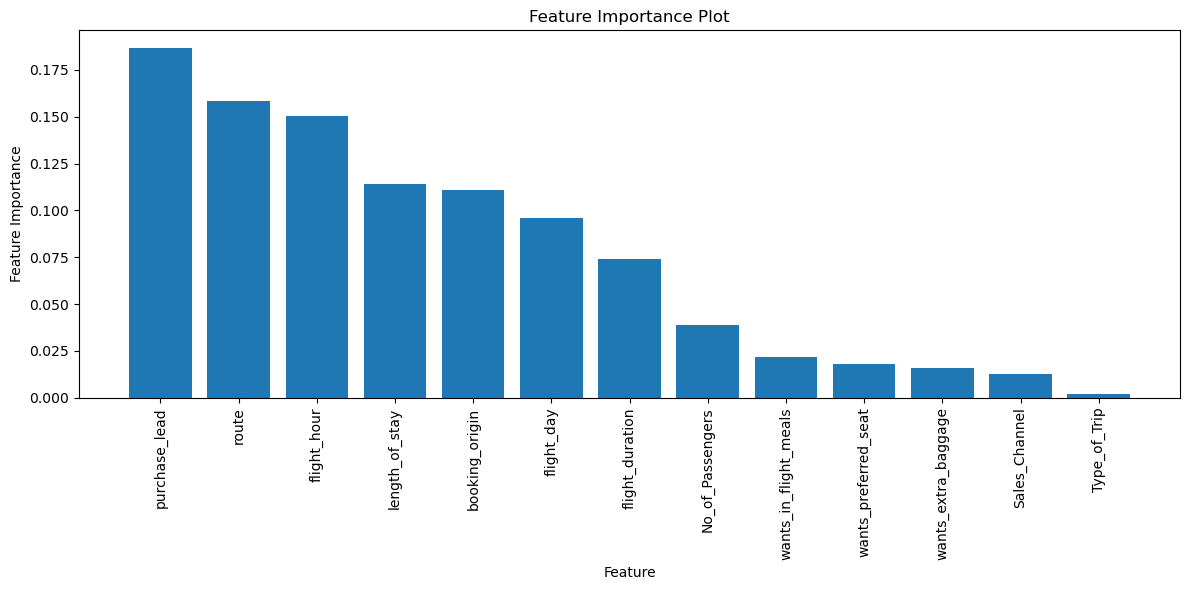

In [89]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)

# Fit the model to the training data
model.fit(xtrain, ytrain)

# Now you can access the feature importances
feature_importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns  # Replace with your actual feature column names

# Sort the features by importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# Create a bar chart to visualize feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align="center")
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.tight_layout()
plt.show()

# Thank You!